<a href="https://colab.research.google.com/github/Cristinamulas/Disposable-Waste-Image-classification-using-Transfer-Learning/blob/main/Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from keras.preprocessing.image import ImageDataGenerator

from keras.preprocessing.image import ImageDataGenerator

import matplotlib.image as mpimg

from keras.models import load_model
from keras.preprocessing import image



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load the model weitghts

In [3]:
model = load_model(r'/content/drive/My Drive/final_project_DL/weights/model_1_60.h5')


### Getting the test folder

In [4]:
%cd "/content/drive/My Drive/final_project_DL"


/content/drive/My Drive/final_project_DL


In [5]:
%cd 'dataset-resized.zip (Unzipped Files)/dataset-resized'

/content/drive/My Drive/final_project_DL/dataset-resized.zip (Unzipped Files)/dataset-resized


In [6]:
base_path = os.getcwd() # get the working direntory


In [7]:
test_data_path = os.path.join(base_path + '/test') # add the new folder
test_data_path

'/content/drive/My Drive/final_project_DL/dataset-resized.zip (Unzipped Files)/dataset-resized/test'

In [8]:
test_generator = ImageDataGenerator(rescale=1./255)

In [9]:
X_test_generator = test_generator.flow_from_directory(test_data_path, target_size=(32, 32), color_mode="rgb", batch_size= 1, class_mode ='categorical')

Found 6 images belonging to 6 classes.


### Visualizing images in test folder

In [10]:
# !pwd
os.chdir('test')

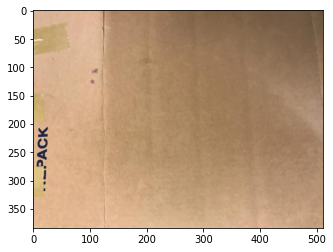

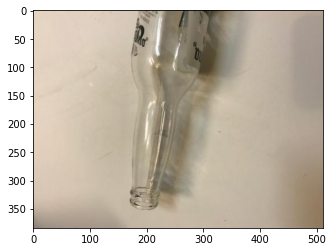

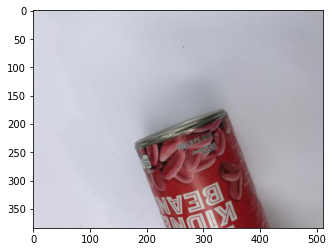

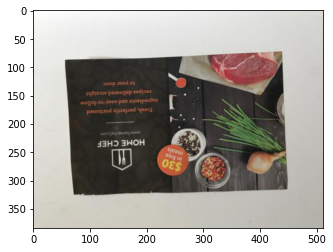

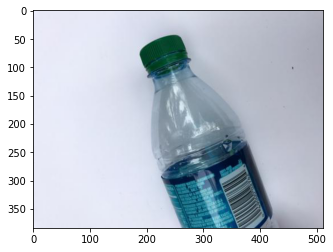

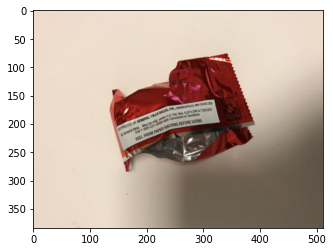

In [11]:
for folder in os.listdir(test_data_path):
  for waste_image in os.listdir(os.path.join(test_data_path + '/' + folder)):
      images_text = mpimg.imread(os.path.join(folder+'/'+ waste_image) )
     
      plt.imshow(images_text)
      plt.show()


### Making Predicctions

In [12]:
path_list_images = [] # container
for folder in os.listdir(test_data_path):
  # print('Actial', folder)
  for waste in os.listdir(os.path.join(test_data_path + '/' + folder)):
     path_list_images.append(os.path.join(test_data_path + '/' + folder +'/'+ waste))




   

In [13]:
classes = X_test_generator.class_indices    
output_imges = {0:'cardboard', 1:'glass', 2:'metal', 3:'paper', 4:'plastic', 5: 'trash'}
img_width, img_height = 32, 32


In [14]:
for waste_image in path_list_images:
  img = image.load_img(waste_image, target_size = (img_width, img_height))
  img = np.expand_dims(img, axis = 0)
  results_classes = model.predict(img)
  prob_class = []
  for i in results_classes:
    for u in i:
      prob_class.append(u)
  print("Predicted Image:- ",output_imges[np.argmax(prob_class)])

for n in output_imges.values():
  print('Actual Image :-' ,n)




Predicted Image:-  cardboard
Predicted Image:-  paper
Predicted Image:-  metal
Predicted Image:-  paper
Predicted Image:-  paper
Predicted Image:-  paper
Actual Image :- cardboard
Actual Image :- glass
Actual Image :- metal
Actual Image :- paper
Actual Image :- plastic
Actual Image :- trash
